# Statsmodels

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

Library documentation: <a>http://statsmodels.sourceforge.net/</a>

### Linear Regression Models

#### Statistical framework
In a statistical context, linear regression is represented as 
$$ Y = \beta_0 + \beta_1 x + \epsilon $$
and for standard statistical inference, one assumes: $$ \epsilon \sim N(0,\sigma^2)$$.

In [7]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(987654)

In [15]:
# create some artificial data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [16]:
# add column of 1s for intercept
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [17]:
# fit model and print the summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.828e+06
Date:                Wed, 01 Mar 2017   Prob (F-statistic):          3.92e-243
Time:                        15:14:40   Log-Likelihood:                -137.38
No. Observations:                 100   AIC:                             280.8
Df Residuals:                      97   BIC:                             288.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1945      0.285      4.185      0.0

In [18]:
# individual results parameters can be accessed
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [  1.19445841e+00   4.65553959e-03   1.00084513e+01]
R2:  0.999989955552


In [19]:
# example with non-linear relationship
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     429.4
Date:                Wed, 01 Mar 2017   Prob (F-statistic):           1.25e-33
Time:                        15:14:57   Log-Likelihood:                -19.414
No. Observations:                  50   AIC:                             46.83
Df Residuals:                      46   BIC:                             54.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5131      0.020     26.241      0.0

In [20]:
# look at some quantities of interest
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.5130795   0.53222159 -0.02061645  4.86754262]
Standard errors:  [ 0.0195525   0.07686318  0.00171672  0.12677915]
Predicted values:  [  4.35213135   4.85351729   5.3133259    5.70255158   6.00265668
   6.20861724   6.32974833   6.38817371   6.41519085   6.44612896
   6.51454438   6.64670748   6.85728644   7.14693733   7.50219632
   7.89769176   8.30031266   8.67464871   8.98880816   9.21965745
   9.35662208   9.4034239    9.37746968   9.30699116   9.22640672
   9.17066651   9.16951021   9.24258095   9.39619793   9.62231826
   9.89985832  10.19815779  10.48201701  10.71748024  10.87741443
  10.94596714  10.92117107  10.81526721  10.65269376  10.46607097
  10.29084169  10.15944829  10.09600238  10.11232342  10.20599677
  10.3607704   10.5492251   10.73727935  10.88978879  10.9763204 ]


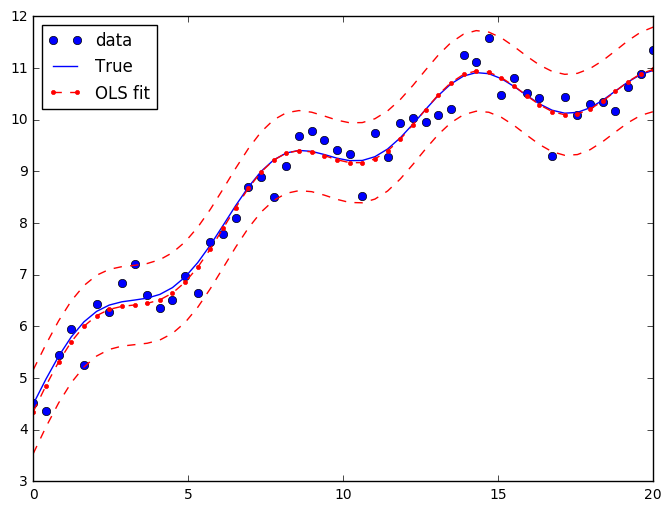

In [21]:
# plot the true relationship vs. the prediction
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS fit")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')